### This notebook demonstrates how a play-by-play win percentage model works and how it might be coded in Python.

The first step is to construct the data set. I gathered all the publicly available play-by-play data from http://www.pro-football-reference.com into a csv file. I added several columns including: Point Spread, Fantasy Data’s Game Key, State, Home Team, etc. I converted the csv into a Pandas data frame. 

In [7]:
import pandas as pd
import numpy as np
import os
os.chdir(r'C:\Users\JG\Documents\NFL Data\2015 play data')


df = pd.read_csv('2015 play data.csv')
df.head()

,State,Game Key,Pt Spread,Wk,Date,Offense,Defense,Hm Team,Away Tm,Quarter,...,O Score,D Score,Hm Score,Vis Score,Total,Detail,Yds,EPB,EPA,Delta EP
0,11080,201510101,-2.5,1,9/13/2015,Cardinals,Saints,Cardinals,Saints,1,...,0,0,0,0,0,Carson Palmer pass complete short left to John...,14,0.28,1.20,0.92
1,11066,201510101,-2.5,1,9/13/2015,Cardinals,Saints,Cardinals,Saints,1,...,0,0,0,0,0,Carson Palmer pass complete deep middle to Mic...,18,1.20,2.39,1.19
2,11048,201510101,-2.5,1,9/13/2015,Cardinals,Saints,Cardinals,Saints,1,...,0,0,0,0,0,Carson Palmer pass complete short right to Joh...,8,2.39,2.93,0.54
3,21250,201510101,-2.5,1,9/13/2015,Cardinals,Saints,Cardinals,Saints,1,...,0,0,0,0,0,Andre Ellington middle for 18 yards (tackle by...,18,1.58,3.45,1.87
4,11032,201510101,-2.5,1,9/13/2015,Cardinals,Saints,Cardinals,Saints,1,...,0,0,0,0,0,Carson Palmer for 3 yards (tackle by Hau'oli K...,3,3.45,3.31,-0.14


In [14]:
## I checked the data to make sure it seemed reasonable

df.describe()

,State,Game Key,Pt Spread,Wk,Quarter,Min Elapsed,Down,ToGo,Yd to TD,O Score,D Score,Hm Score,Vis Score,Total,Yds,EPB,EPA,Delta EP
count,32994.000000,3.299400e+04,32994.000000,32994.000000,32994.000000,32994.000000,32994.000000,32994.000000,32994.000000,32994.000000,32994.000000,32994.000000,32994.000000,32994.000000,32994.000000,32994.000000,32994.000000,32994.000000
mean,18841.853519,2.015109e+08,-2.131357,9.067800,2.576984,31.470837,1.791871,8.698460,53.294993,10.496302,11.777444,11.636479,10.637267,22.273747,5.472601,1.680286,1.712205,0.031919
std,8059.173854,5.001627e+02,5.321060,5.002013,1.139511,17.777278,0.817544,3.945484,24.705477,9.529644,10.170523,10.090657,9.630875,16.414768,8.908561,1.760221,2.238196,1.406928
min,10101.000000,2.015101e+08,-15.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-22.000000,-5.160000,-7.000000,-11.650000
25%,11065.000000,2.015105e+08,-6.000000,5.000000,2.000000,16.350000,1.000000,6.000000,35.000000,3.000000,3.000000,3.000000,3.000000,9.000000,0.000000,0.280000,0.170000,-0.690000
50%,20434.000000,2.015109e+08,-3.000000,9.000000,3.000000,30.450000,2.000000,10.000000,57.000000,9.000000,10.000000,10.000000,9.000000,20.000000,3.000000,1.410000,1.560000,-0.160000
75%,21414.000000,2.015113e+08,2.500000,13.000000,4.000000,46.966667,2.000000,10.000000,74.000000,17.000000,18.000000,18.000000,17.000000,34.000000,8.000000,2.920000,3.120000,0.730000
max,43237.000000,2.015117e+08,11.500000,17.000000,5.000000,71.083333,4.000000,42.000000,99.000000,51.000000,51.000000,51.000000,49.000000,98.000000,90.000000,6.970000,7.000000,8.070000


In [131]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

ImportError: No module named seaborn

I selected only the plays from Game Key 201510101 and added fields Win Prob, Adj W Prob, EP, 1st down prob, TD prob, FG prob from http://wp.advancednflstats.com/winprobcalc1.php to make sure my model was in the ballpark.                                                                                             



In [8]:
import os
os.chdir(r'C:\Users\JG\Documents\NFL Data\2015 play data')

game = pd.read_csv('201510101.csv')


for row in game:
    print row
    


State
Game Key
Pt Spread
Wk
Date
Offense
Defense
Hm Team
Away Tm
Quarter
Min Elapsed
Down
ToGo
Yd to TD
Location
O Score
D Score
Hm Score
Vis Score
Total
Detail
Yds
EPB
EPA
Delta EP
Win Prob
Adj W Prob
EP
1st down prob
TD prob
FG prob


******************************************************************************************************
The margin of victory in an NFL game can be modeled as a normal random variable with mean equal to the point spread and standard deviation equal to roughly 13.45.





I created a function to calculate the probability that the home team will win, given the following arguments: home team, team on offense, home score, visitor score, expected points before the play, point spread, and time. The win probability throughout the notebook is calculated 



In [19]:
from scipy.stats import norm

def calc_win_prob(hm_team, offense, hm_score, vis_score, epb, spread, time_elapsed):
    score_diff = hm_score - vis_score                #calc score differential
    new_mean = spread * (1 - (time_elapsed / 60))    #adjust the mean based on time elapsed
    new_sd = 13.45 * ((60 - time_elapsed) / 60)**0.5 #adjust the std dev based on time elapsed
    #If the home team on offense, add E(points); add .5 for continuity correction
    if hm_team == offense:             
        ediff = score_diff + epb + 0.5
    #Else the home team is on defense, subtract E(points); add .5 for continuity correction    
    else:
        ediff = score_diff - epb + 0.5
    z_score = (ediff - new_mean) / new_sd       #standardize the RV                  
    return norm.cdf(z_score)       #Calc the win probability

****************************************************************************
Below is an example of a win probability graph

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


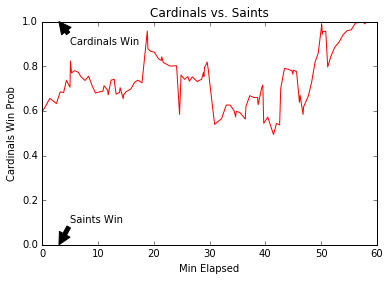

In [17]:
x= []
y= []

for play in game.iterrows():
    hm_team = play[1]['Hm Team']
    offense = play[1]['Offense']
    hm_score = play[1]['Hm Score']
    vis_score = play[1]['Vis Score']
    epb = play[1]['EPB']
    spread = play[1]['Pt Spread']
    time_elapsed = play[1]['Min Elapsed']
    score_diff = hm_score - vis_score
    down = play[1]['Down']
    distance = play[1]['ToGo']
    yd_line = play[1]['Yd to TD']
    adj_w_prob = play[1]['Adj W Prob']
    my_w_prob = calc_win_prob(hm_team, offense, hm_score, vis_score, epb, spread, time_elapsed)
    y.append(my_w_prob) 
    x.append(time_elapsed)
    
     
%pylab inline
plt.plot(x, y, 'r-')
plt.axis([0, 60, 0, 1])
plt.title('Cardinals vs. Saints')
plt.xlabel('Min Elapsed')
plt.ylabel('Cardinals Win Prob')
plt.annotate('Cardinals Win', xy = (3,1), xytext = (5, 0.9), arrowprops = dict(facecolor = 'black'))
plt.annotate('Saints Win', xy = (3,0), xytext = (5, 0.1), arrowprops = dict(facecolor = 'black'))
plt.show()
    

****************************************************************************************************
Above is the model used by AFA (now on ESPN). 

There are a number of improvements that can be made to this model. 
    - The model assumes all scoring is uniform which is not true
    - The model fails to account for the ability of offenses to produce long plays, Rodgers vs. Smith
    - The model is 100% empirical, it could be improved with parameterization
    - The model assumes that the variance of the MoV is the same for all games, not true - it is       heteroskedastic

*****************************************************************************************
Example of the text that could be printed with each play

In [20]:
game2 = pd.read_csv('201510102.csv')

for play in game2.iterrows():
    hm_team = play[1]['Hm Team']
    offense = play[1]['Offense']
    hm_score = play[1]['Hm Score']
    vis_score = play[1]['Vis Score']
    epa = play[1]['EPA']
    spread = play[1]['Pt Spread']
    time_elapsed =play[1]['Min Elapsed']
    score_diff = hm_score - vis_score
    down = play[1]['Down']
    distance = play[1]['ToGo']
    yd_line = play[1]['Yd to TD']
    w_pct = round(calc_win_prob(hm_team, offense, hm_score, vis_score, epa, spread, time_elapsed) \
                  * 100, 2)    
    
    print play[1]['Detail']
    print play[1]['EPA'], "points are expected from this drive" 
    print "The", hm_team, "have a", w_pct,"% chance to win"
    print "     ************************************************************"
    

Sam Bradford pass complete short right to DeMarco Murray for 2 yards (tackle by Phillip Adams)
0.0 points are expected from this drive
The Falcons have a 42.63 % chance to win
     ************************************************************
DeMarco Murray right guard for 2 yards (tackle by Justin Durant)
-0.43 points are expected from this drive
The Falcons have a 43.91 % chance to win
     ************************************************************
Sam Bradford pass incomplete deep left intended for Zach Ertz
-1.77 points are expected from this drive
The Falcons have a 47.94 % chance to win
     ************************************************************
Tevin Coleman left tackle for 3 yards (tackle by Cedric Thornton)
0.47 points are expected from this drive
The Falcons have a 44.1 % chance to win
     ************************************************************
Matt Ryan pass complete short middle to Julio Jones for 17 yards (tackle by Nolan Carroll)
1.93 points are expected from